In [73]:
# for linear algebra
import numpy as np
# for data processing
import pandas as pd
# for plotting
import matplotlib.pyplot as plt
# for scaling and encoding. Scaling is used to normalize the data within a particular range. Encoding is used to convert categorical data into numeric data.
from sklearn import preprocessing
# for the check the error and accuracy of the model
from sklearn import metrics
# for splitting the data into train and test data
from sklearn.model_selection import train_test_split
# for linear regression model
from sklearn.linear_model import LinearRegression
# for polynomial features
import math


#Loading Data
data = pd.read_csv('C:\\Users\ERALP\OneDrive\Desktop\Software Engineering\SWE599---Financial-Time-Series-Volatility-and-Return-Forecasting\Code\TSLA.csv')

#Seeing Data
data.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
1,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
3,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
4,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500


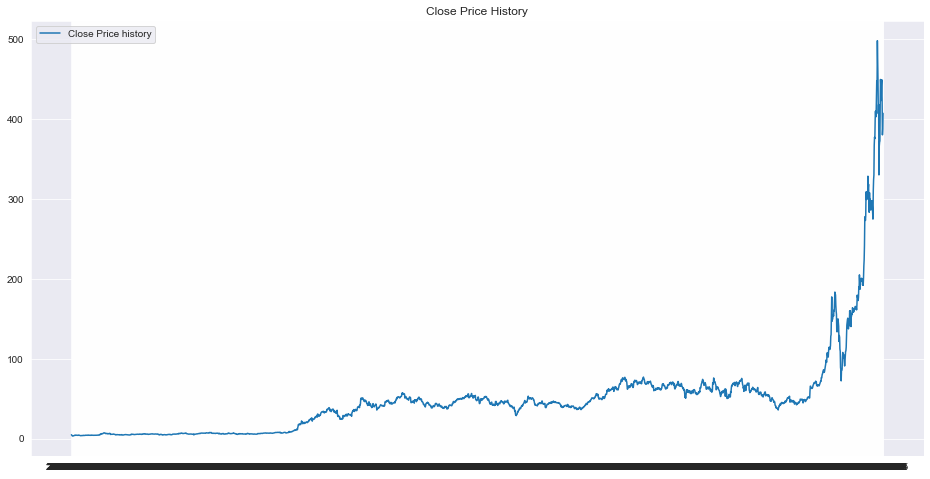

In [76]:
plt.figure(figsize=(16,8))
plt.plot(data['Date'], data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.legend()
plt.show()

In [58]:
#Checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2579 non-null   object 
 1   Open       2579 non-null   float64
 2   High       2579 non-null   float64
 3   Low        2579 non-null   float64
 4   Close      2579 non-null   float64
 5   Adj Close  2579 non-null   float64
 6   Volume     2579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.2+ KB


In [59]:
# Checking for data description
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
std,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,59.339000,60.171000,57.841000,59.020000,59.020000,3.979150e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


In [60]:
# Separating the input and output columns

X = data[['High', 'Low', 'Open', 'Volume']].values
y = data['Close'].values



In [61]:
X

array([[6.08400000e+00, 4.66000000e+00, 5.15800000e+00, 8.59355000e+07],
       [5.18400000e+00, 4.05400000e+00, 5.00000000e+00, 4.10940000e+07],
       [4.62000000e+00, 3.74200000e+00, 4.60000000e+00, 2.56990000e+07],
       ...,
       [4.12149994e+02, 3.75880005e+02, 4.05160004e+02, 9.50742000e+07],
       [3.99500000e+02, 3.51299988e+02, 3.63799988e+02, 9.65611000e+07],
       [4.08730011e+02, 3.91299988e+02, 3.93470001e+02, 6.70684000e+07]])

In [62]:
y

array([  4.766   ,   4.392   ,   3.84    , ..., 380.359985, 387.790009,
       407.339996])

In [63]:
# Splitting the data into train and test data. The test data is 30% of the total data. Random state is used to select the same set of data points every time the code is run.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [64]:
# Linear Regression Model

regressor = LinearRegression()

# Fitting the data in the Model

regressor.fit(X_train, y_train)

LinearRegression()

In [65]:
# Predicting the values of test data
print(regressor.coef_)

[ 8.87095614e-01  5.85513083e-01 -4.76088446e-01 -1.00579988e-08]


In [66]:
# Predicting the values of test data
print(regressor.intercept_)

0.2156250656161376


In [67]:
# Prediction

#y_
predicted = regressor.predict(X_test)

print(predicted)

[ 48.28710377   5.46796473  67.81519558   6.68986368  50.57475389
  50.15802018  41.85593245  24.42517644  49.54803051  43.90230937
 298.79298492  37.51402064   7.85499938  43.74164349  54.54668473
   4.86374123  43.05771831  62.23745654   6.62671137  50.86453905
 162.17778438  54.01208146  26.89490796  17.34867616  67.53108095
  45.30737392  72.83821008  49.06133251 143.27239734  51.92928264
  50.70256477  29.52666431  49.57760378  47.45345367  32.76661722
 155.0533991   62.70618124   4.36559773  43.69638043  27.58513271
  58.69012648  38.24953676  38.95889794  38.59116288  23.66760729
  39.00734263   3.45184405  40.98080408   8.01183053  52.44962283
   3.97031791   5.74775758   3.01063992  42.26288089  33.17485593
   7.30407959   7.21164416  49.53701516 449.58142712   8.24903154
 130.87602639  47.09386717  70.10875987  41.83007477  43.81371492
  55.29270419 126.86476192  64.01792297  48.65801981  67.90733784
   5.13970989  58.15189852  39.66296045  41.28471972   6.80734248
  37.21190

In [68]:
# Combining the predicted values and actual values in a dataframe

data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predicted.flatten()})

In [69]:
data1.head(20)

,Actual,Predicted
0,48.598000,48.287104
1,5.348000,5.467965
2,68.570000,67.815196
3,6.430000,6.689864
4,49.812000,50.574754
5,50.004002,50.158020
6,41.400002,41.855932
7,24.690001,24.425176
8,49.785999,49.548031
9,43.472000,43.902309


In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 0.4691606823712072
Mean Squared Error: 0.9033937304732822
Root Mean Squared Error: 0.9504702680638054


In [71]:
# Plotting the actual and predicted values

graph = data1.head(20)


<AxesSubplot:>

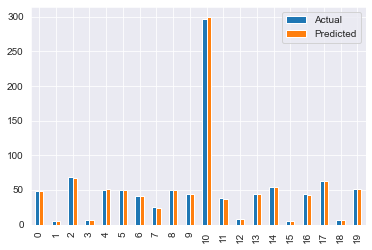

In [72]:
graph.plot(kind='bar')